## Linear Regression using Scikit-Learn

#### Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

### 2. Problem Statement
- admission prediction
- X variables: GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research
- Y variable: Chance of Admit

In [2]:
admission_df = pd.read_csv("~/Downloads/prediction of Graduate Admissions/Admission_Predict_Ver1.1.csv")
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [26]:
#x_train is the input variable
#y_train is the target
admission_df.columns
x_train = admission_df.drop(columns=['Chance of Admit ', 'Serial No.'])
y_train = admission_df['Chance of Admit ']
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train =      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
495        332          108                  5  4.5   4.0  9.02         1
496        337          117                  5  5.0   5.0  9.87         1
497        330          120                  5  4.5   5.0  9.56         1
498        312          103                  4  4.0   5.0  8.43         0
499        327          113                  4  4.5   4.5  9.04         0

[500 rows x 7 columns]
y_train = 0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       .

### Gradient Descent

#### Scale/normalize the training data

In [27]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)

# Compute the Peak-to-Peak range for raw data
peak_to_peak_raw = x_train.max(axis=0) - x_train.min(axis=0)

# Compute the Peak-to-Peak range for normalized data
peak_to_peak_norm = x_norm.max(axis=0) - x_norm.min(axis=0)

print(f"Peak to Peak range by column in Raw X:\n{peak_to_peak_raw}")
print(f"Peak to Peak range by column in Normalized X:\n{peak_to_peak_norm}")

Peak to Peak range by column in Raw X:
GRE Score            50.00
TOEFL Score          28.00
University Rating     4.00
SOP                   4.00
LOR                   4.00
CGPA                  3.12
Research              1.00
dtype: float64
Peak to Peak range by column in Normalized X:
[4.43111268 4.60845971 3.50149951 4.04035457 4.32655233 5.16378735
 2.01455741]


#### Create and fit the regression model

In [28]:
#gradient descent regression model: SGDRegressor
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(x_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 8, number of weight updates: 4001.0


#### View parameters

In [29]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters: w: {w_norm}, b:{b_norm}")

model parameters: w: [0.02869082 0.01741068 0.00844277 0.00401445 0.01787532 0.06328047
 0.01163097], b:[0.72043373]


#### Make predictions

In [30]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(x_norm)
# make a prediction using w,b. 
y_pred = np.dot(x_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

prediction using np.dot() and sgdr.predict match: True


#### Plot Results

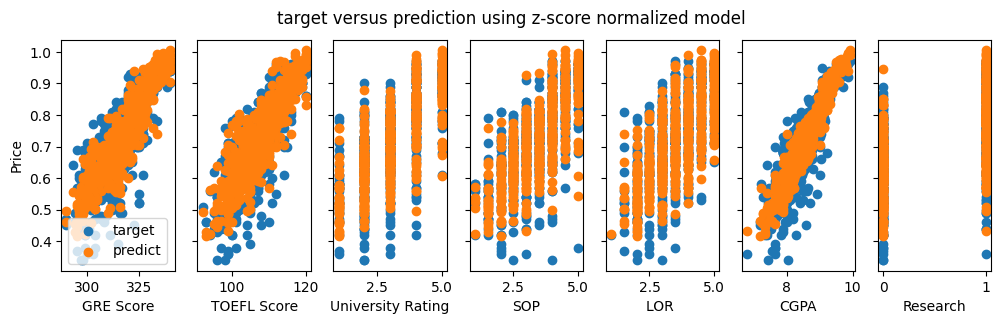

In [32]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,7,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train.iloc[:,i],y_train, label = 'target')
    ax[i].set_xlabel(x_train.columns[i])
    ax[i].scatter(x_train.iloc[:,i],y_pred, label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()